# PROJEKT

In [1]:
using Plots

## Symulacja przebiegu epidemii

In [2]:
function epidemic_simulation(population, N0, meetings, infection_progress, resistance, lockdowns,
        vaccine_day, vaccinated, death_prop, recovery_prop, infection_prop, T)
    
    N = [N0]
    infected_increase = [N0]
    resistant_increase = [0]
    resistant_number = 0
    dead_people = 0
    
    # For each day in T days
    for t in 1:T
        infected = N[t]   # current infected
        new_infected = 0
        new_resistant = 0
        met = meetings
        q = infection_prop
        
        # End of resistance time
        if t > resistance
            resistant_number -= resistant_increase[t - resistance]
        end
        
        # Infected from last days who don't infect (exposed)
        if t >= infection_progress
            last_infected = sum(infected_increase[t-infection_progress+1:t])
        else
            last_infected = sum(infected_increase[1:t])
        end
        
        # If it's lockdown, decrease meetings and infection propability
        for lockdown in lockdowns
            if t >= lockdown[1] && t <= lockdown[2]
                met = 1
                q = infection_prop/2
            end
        end
        
        # For each infected person
        for person in 1:(N[t] - last_infected)
            
            # For each met person that day
            for met_person in 1:meetings
                infected_one = (rand()<q) * (rand()<((population - infected - resistant_number - dead_people)/population))
                infected += infected_one
                new_infected += infected_one
            end
            
            # Possibility to recover
            convalescent = rand()<recovery_prop
            infected -= convalescent
            new_resistant += convalescent
            resistant_number += convalescent
            
            # Possibilty to die
            if convalescent == 0
                dead_one = rand()<death_prop
                infected -= dead_one
                dead_people += dead_one
            end
        end
        
        # Vaccination
        if t >= vaccine_day
            resistant_number += vaccinated
        end
        
        append!(infected_increase, new_infected)
        append!(resistant_increase, new_resistant)
        
        if infected > population - dead_people
            infected = population - dead_people
        end
        
        append!(N, infected)
    end
    
    plot(0:T, N,
        title="Deaths: $dead_people",
        xlabel="days (t)",
        ylabel="infected (N)",
        label="Nₜ")
end

epidemic_simulation (generic function with 1 method)

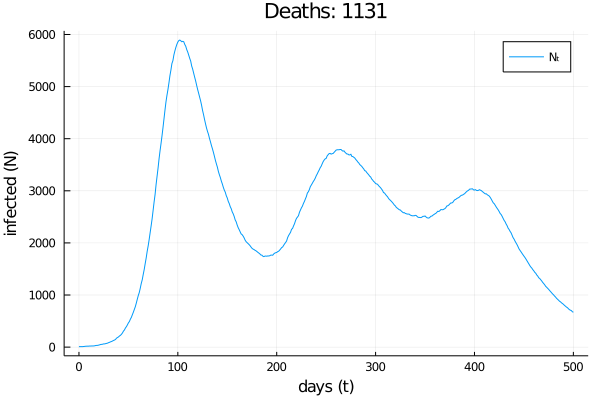

In [3]:
population = 10000
N0 = 10
meetings = 3
infection_progress = 4
resistance = 90
lockdowns = []
vaccine_day = 400
vaccinated = 50
death_prop = 0.001
recovery_prop = 0.02
infection_prop = 0.05
T = 500

epidemic_simulation(population, N0, meetings, infection_progress, resistance, lockdowns, vaccine_day, vaccinated, death_prop, recovery_prop, infection_prop, T)

In [ ]:
## 
## Symulacja przebiegu epidemii na pewnym obszarze

In [4]:
function area_epidemic_simulation(size, N0, meetings, infection_progress, loosing_resist_prop, lockdowns,
        vaccine_day, vaccinated, death_prop, recovery_prop, infection_prop, T)
    # 0 - dead
    # 1 - susceptible
    # 2 - exposed
    # 3 - infected
    # 4 - recovered
    
    deaths = 0
    population = ones(size, size)
    for person in 1:N0
        population[rand(1:size), rand(1:size)] = 3
    end
    
    anim = @animate for t in 1:T
        for row in 1:size
            for person in 1:size
                if population[row, person] == 3
                    
                    for met_person in 1:meetings
                        if rand()<infection_prop
                            m = rand(-1:1)
                            n = rand(-1:1)
                            try
                                if population[row + m, person + n] == 1
                                    population[row + m, person + n] = 3
                                end
                            catch e
                                continue
                            end
                        end
                    end
                    
                    if rand()<recovery_prop
                        population[row, person] = 4
                    elseif rand()<death_prop
                        population[row, person] = 0
                        deaths += 1
                    end
                    
                elseif population[row, person] == 4
                    if rand()<loosing_resist_prop
                        population[row, person] = 1
                    end
                end
            end
        end
        heatmap(population,
            title="Day: $t    Deaths: $deaths",
            color=[:black, :gray, :yellow, :orange, :green],
            clim=(0, 4),
            size=(700, 700),
            aspectratio=1
        )
    end
    gif(anim, "epidemic.gif", fps=15) |> display
end

area_epidemic_simulation (generic function with 1 method)

Plots.AnimatedGif("c:\\Users\\szymo\\OneDrive\\Dokumenty\\GitHub\\Symulacja-epidemii\\epidemic.gif")
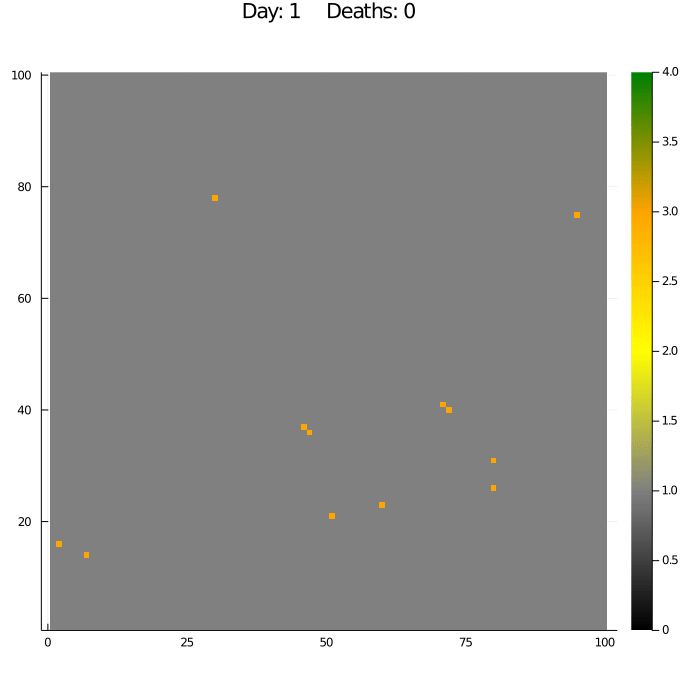

┌ Info: Saved animation to 
│   fn = c:\Users\szymo\OneDrive\Dokumenty\GitHub\Symulacja-epidemii\epidemic.gif
└ @ Plots C:\Users\szymo\.julia\packages\Plots\z5Msu\src\animation.jl:104


In [5]:
size = 100
N0 = 10
meetings = 1
infection_progress = 4
loosing_resist_prop = 0.02
lockdowns = [[50, 200], [340, 400]]
vaccine_day = 400
vaccinated = 50
death_prop = 0.001
recovery_prop = 0.05
infection_prop = 0.2
T = 800

area_epidemic_simulation(size, N0, meetings, infection_progress, loosing_resist_prop, lockdowns,
        vaccine_day, vaccinated, death_prop, recovery_prop, infection_prop, T)